# MadGraph 

In [1]:
import pandas as pd
import numpy as np
import subprocess
import time

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt 

In [33]:
#good plots
plt.rcParams.update({'font.size': 20}) 
#plt.rc('font',size='18')

# $p\,p\to \chi^+\chi^-$

NOTA: the file mg5_configuration.txt tiene desabilitada la opcion del Browser

In [27]:
'''
#!/usr/bin/env python

#Import run_dicctionary.py
#This file run a lot of dicctionaryes to run SPheno

import pyslha
import pandas as pd
import numpy as np
import subprocess
import time
import sys

x=[]

for i in range(0,10):

    mcha = 100.01+(100.*i)
    #myfile5 is located in madgraph directory and contains the process to be launched and 
    #the parameters to be changed in the param_card
    f1 = open('/home/anferivera/Work/MG5_aMC_v2_5_5/myfile5', "w")
    f1.write(str("launch SDdiracDMXXb") + '\n' + str("set mcha") + '\t' + str(mcha) + '\n' )
    f1.close()

    #Run MadGraph
    cr = subprocess.getoutput('~/Work/MG5_aMC_v2_5_5/./bin/mg5_aMC ~/Work/MG5_aMC_v2_5_5/myfile5')
    cross = eval(cr.split('Cross-section :   ')[1].split('+-')[0])
    print(cross)

    x.append([mcha,cross])
    
x=np.asarray(x)
xd=pd.DataFrame(x,columns=['mcha','cross'])

xd.to_csv('xd_madgrph_XXbar.csv')
'''

2.326
0.1894
0.03977
0.01212
0.004531
0.001929
0.0008968
0.0004443
0.0002318
0.0001256


Read Output

In [30]:
xd=pd.read_csv('xd_madgrph_XXbar.csv')

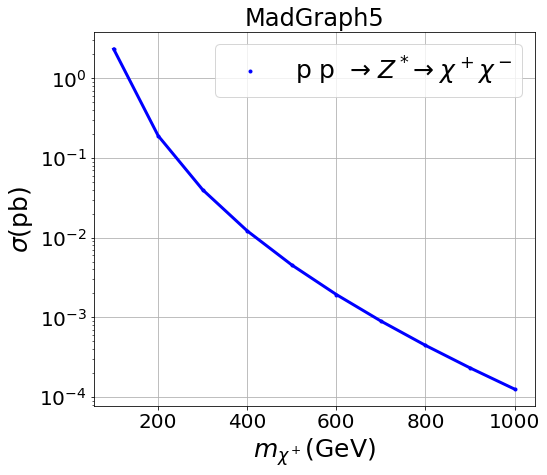

In [45]:
plt.figure(figsize=(8,7))

plt.semilogy(xd.mcha,xd.cross,'b.',label=r'p p $\;\to\; Z^*\to\; \chi^+\chi^-$')
plt.semilogy(xd.mcha,xd.cross,'b-', lw=3, label='')

plt.legend(prop={'size':25},loc='best')
plt.xlabel(r'$m_{\chi^+}$(GeV)',size=25)
plt.ylabel(r'$\sigma$(pb)',size=25)

plt.title('MadGraph5')
plt.grid()
#plt.ylim(1e-1,1e2)
#plt.xlim(100,200)

plt.tight_layout()
#plt.savefig('plots/sigma_pp_xx_MadGraph.pdf')

old plot for other model

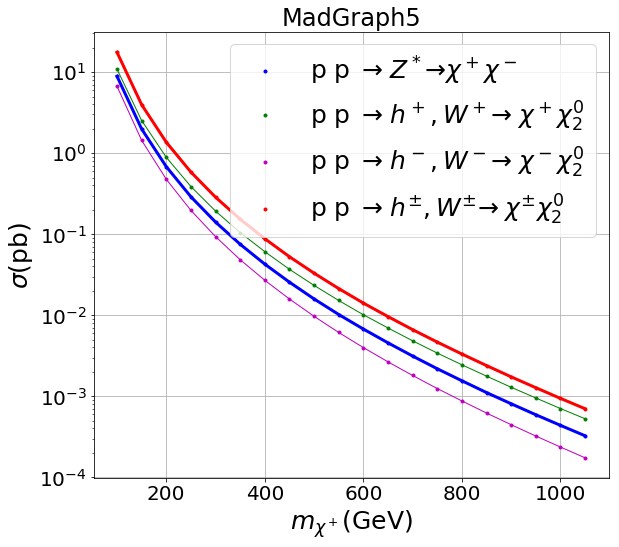

Campare with Fig.11 of Singlet-triplet fermionic DM and LHC phenomenology: https://arxiv.org/abs/1711.08888